# Concrete Slump Test Regression

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="https://i0.wp.com/civiconcepts.com/wp-content/uploads/2019/08/Slump-Cone-test-of-concrete.jpg?fit=977%2C488&ssl=1">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (9):
(component kg in one M^3 concrete)(7):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

Measurements (2):
* SLUMP (cm)
* FLOW (cmTarget variable(1):
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

# Importing dependencies

In [156]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Loading data

In [157]:
df = pd.read_csv("cement_slump.csv")
df

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000,34.990
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000,41.140
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000,41.810
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500,42.080
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000,26.820
...,...,...,...,...,...,...,...,...,...,...
98,248.300,101.000,239.100,168.900,7.700,954.200,640.600,0.000,20.000,49.970
99,248.000,101.000,239.900,169.100,7.700,949.900,644.100,2.000,20.000,50.230
100,258.800,88.000,239.600,175.300,7.600,938.900,646.000,0.000,20.000,50.500
101,297.100,40.900,239.900,194.000,7.500,908.900,651.800,27.500,67.000,49.170


# EDA and Graphical analysis

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [159]:
df.describe()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
count,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000
mean,229.894,77.974,149.015,197.168,8.540,883.979,739.605,18.049,49.611,36.039
std,78.877,60.461,85.418,20.208,2.808,88.391,63.342,8.751,17.569,7.837
min,137.000,0.000,0.000,160.000,4.400,708.000,640.600,0.000,20.000,17.190
25%,152.000,0.050,115.500,180.000,6.000,819.500,684.500,14.500,38.500,30.900
50%,248.000,100.000,164.000,196.000,8.000,879.000,742.700,21.500,54.000,35.520
75%,303.900,125.000,235.950,209.500,10.000,952.800,788.000,24.000,63.750,41.205
max,374.000,193.000,260.000,240.000,19.000,1049.900,902.000,29.000,78.000,58.530


In [160]:
df.shape

(103, 10)

In [161]:
df.isnull().sum()

Cement                                0
Slag                                  0
Fly ash                               0
Water                                 0
SP                                    0
Coarse Aggr.                          0
Fine Aggr.                            0
SLUMP(cm)                             0
FLOW(cm)                              0
Compressive Strength (28-day)(Mpa)    0
dtype: int64

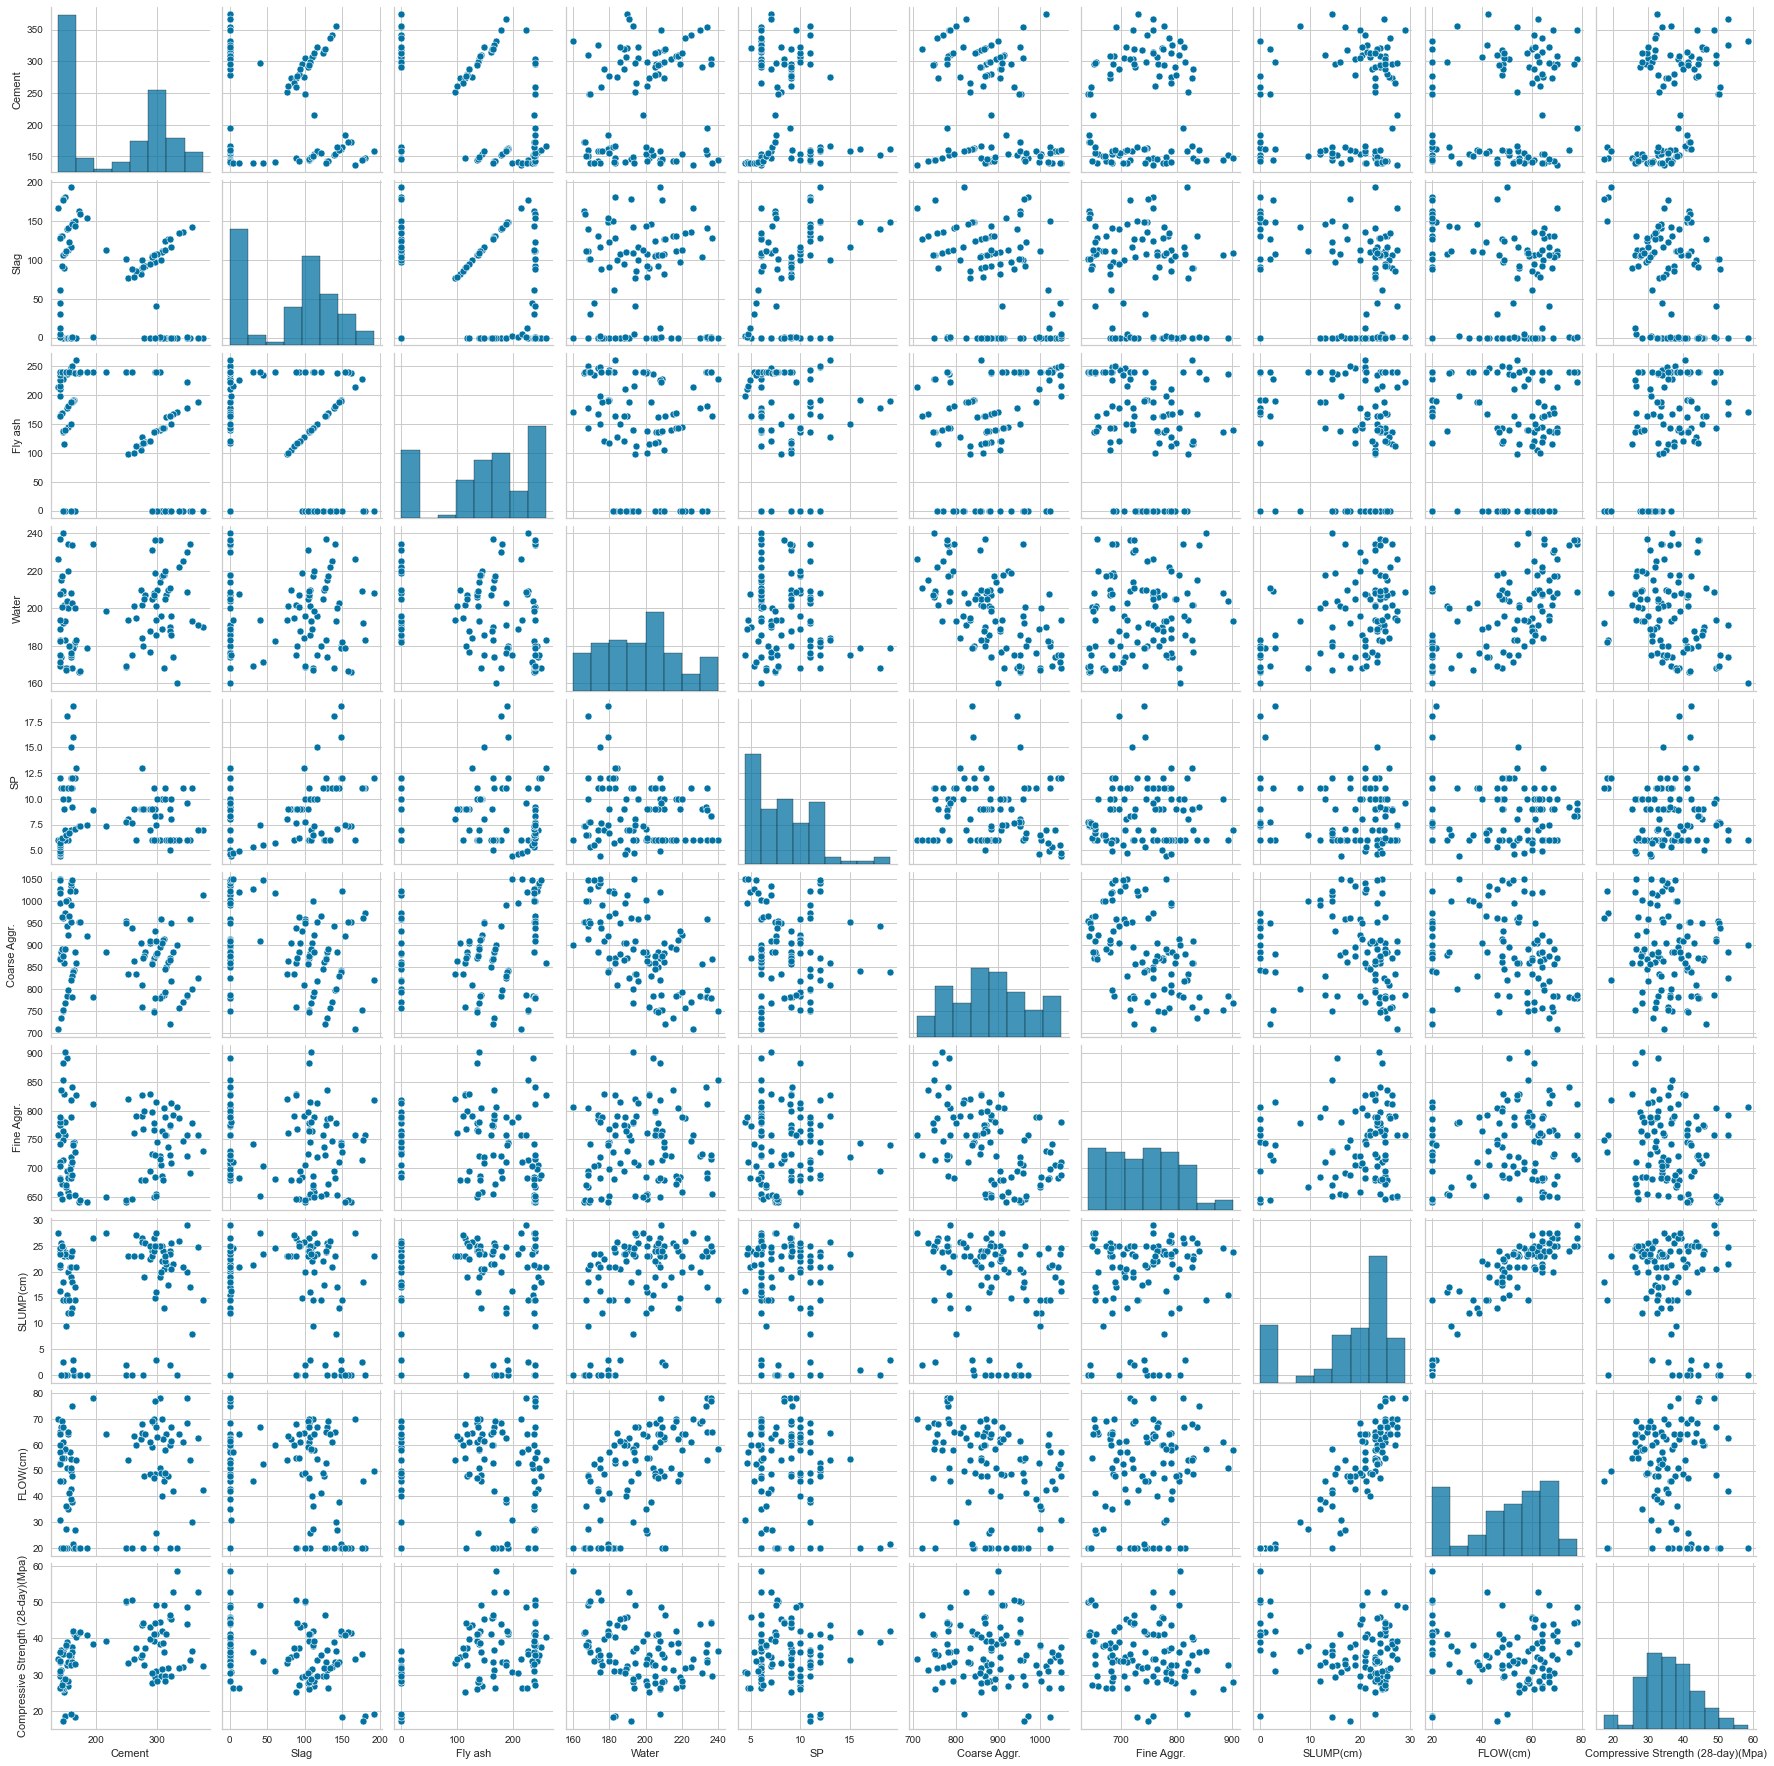

In [162]:
sns.pairplot(df)

In [163]:
r = len(df.columns[0:])//2+ 1*(len(df.columns[0:])%2==1)
c = 2
r,c

(5, 2)

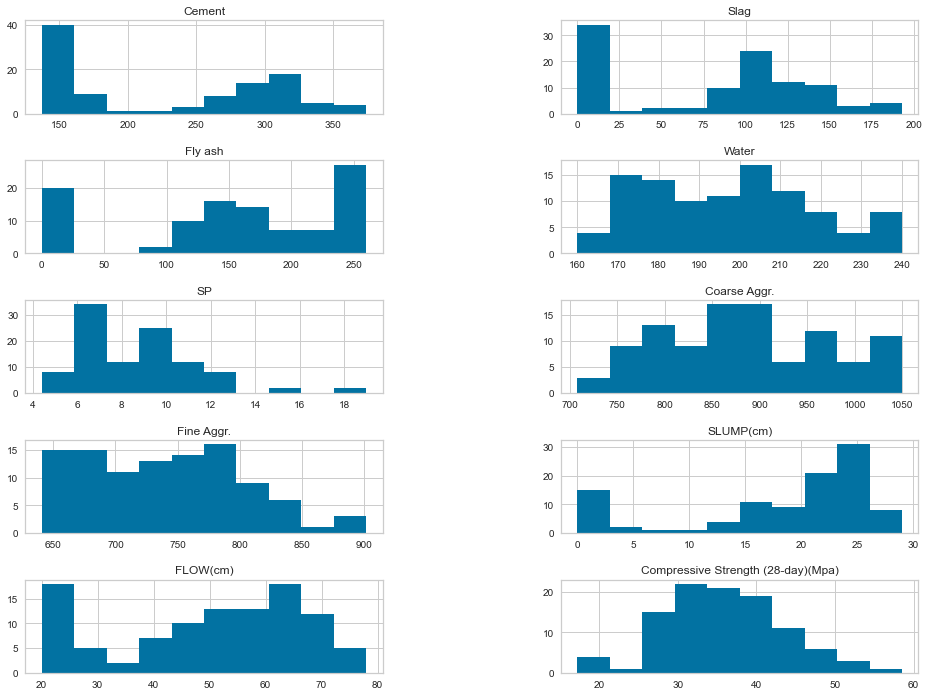

In [164]:
fig, ax = plt.subplots(nrows=r,ncols=c, figsize=(16,12))
fig.subplots_adjust(left=None,    bottom=None,    right=None,    top=None,    wspace=0.5,    hspace=0.5)

for i,col in enumerate(df.columns[0:]):
    ax[i//2,i%2].hist(df[col])
    ax[i//2,i%2].set_title(col)

## OR

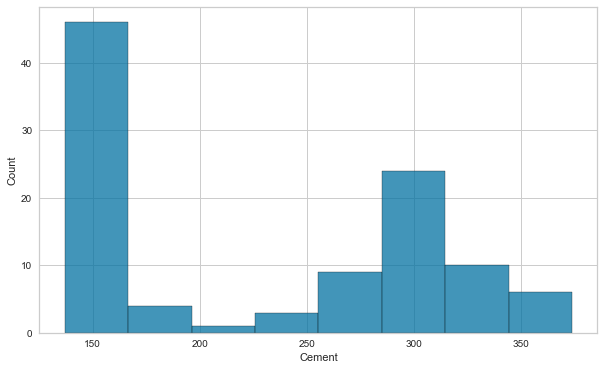

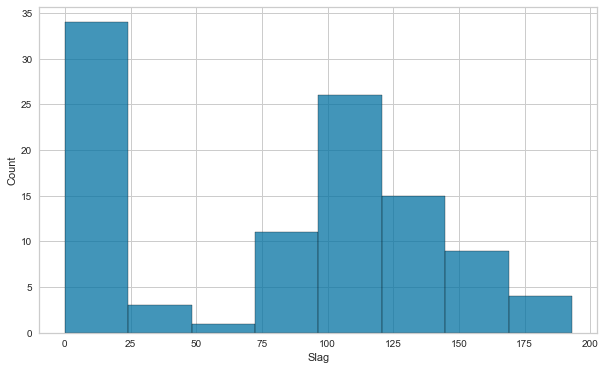

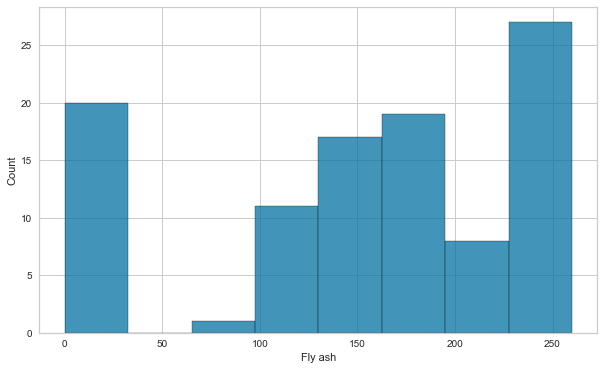

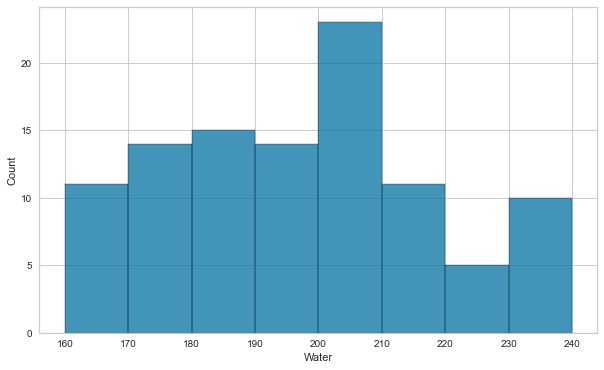

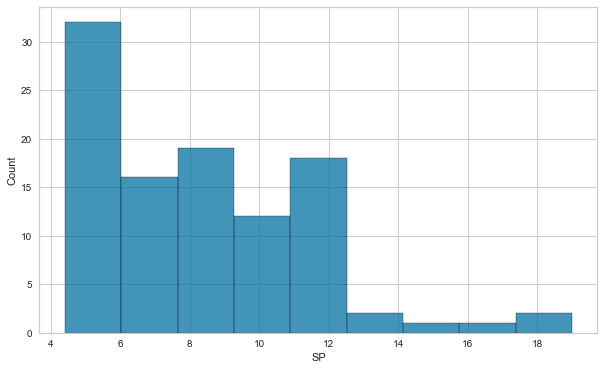

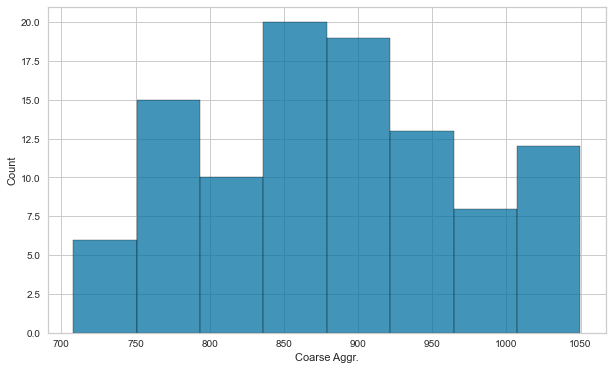

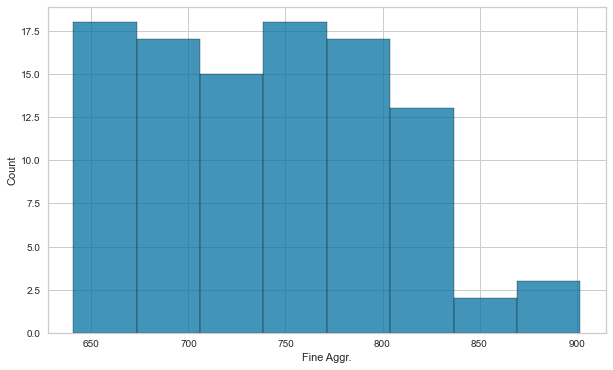

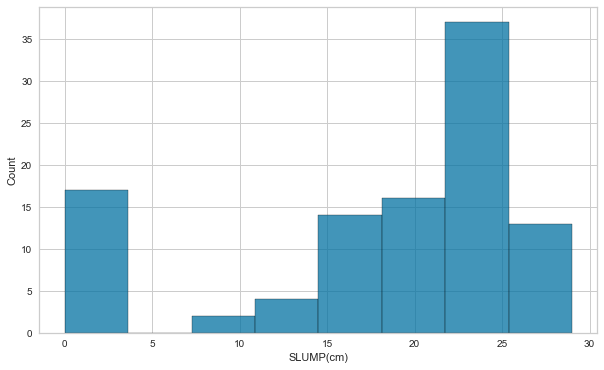

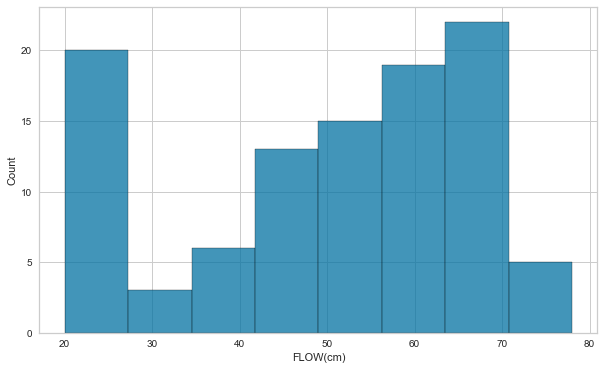

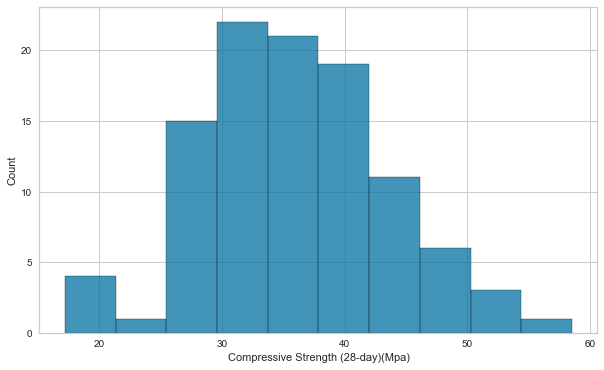

In [165]:
for i,col in enumerate(df.columns[0:]):
    plt.figure(i)
    sns.histplot(df[col])

In [166]:
corr= df.corr()

In [167]:
corr

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
Cement,1.000,-0.244,-0.487,0.221,-0.106,-0.310,0.057,0.146,0.186,0.446
Slag,-0.244,1.000,-0.323,-0.027,0.307,-0.224,-0.184,-0.284,-0.327,-0.332
Fly ash,-0.487,-0.323,1.000,-0.241,-0.144,0.173,-0.283,-0.119,-0.055,0.444
Water,0.221,-0.027,-0.241,1.000,-0.155,-0.602,0.115,0.467,0.632,-0.254
SP,-0.106,0.307,-0.144,-0.155,1.000,-0.104,0.058,-0.213,-0.176,-0.038
Coarse Aggr.,-0.310,-0.224,0.173,-0.602,-0.104,1.000,-0.489,-0.188,-0.326,-0.161
Fine Aggr.,0.057,-0.184,-0.283,0.115,0.058,-0.489,1.000,0.202,0.190,-0.155
SLUMP(cm),0.146,-0.284,-0.119,0.467,-0.213,-0.188,0.202,1.000,0.906,-0.223
FLOW(cm),0.186,-0.327,-0.055,0.632,-0.176,-0.326,0.190,0.906,1.000,-0.124
Compressive Strength (28-day)(Mpa),0.446,-0.332,0.444,-0.254,-0.038,-0.161,-0.155,-0.223,-0.124,1.000


In [168]:
plt.rcParams["figure.figsize"] = (11,5)

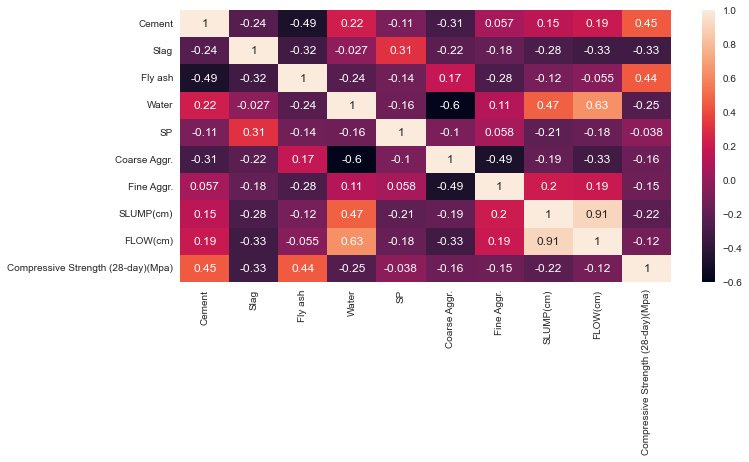

In [169]:
sns.heatmap(df.corr(), annot=True);

In [170]:
cols = list(df.iloc[:,0:].select_dtypes(include="object").columns)
cols


[]

In [171]:
R2_score= corr**2
R2_score

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
Cement,1.000,0.059,0.237,0.049,0.011,0.096,0.003,0.021,0.035,0.199
Slag,0.059,1.000,0.104,0.001,0.094,0.050,0.034,0.081,0.107,0.110
Fly ash,0.237,0.104,1.000,0.058,0.021,0.030,0.080,0.014,0.003,0.197
Water,0.049,0.001,0.058,1.000,0.024,0.363,0.013,0.218,0.399,0.065
SP,0.011,0.094,0.021,0.024,1.000,0.011,0.003,0.045,0.031,0.001
Coarse Aggr.,0.096,0.050,0.030,0.363,0.011,1.000,0.239,0.035,0.106,0.026
Fine Aggr.,0.003,0.034,0.080,0.013,0.003,0.239,1.000,0.041,0.036,0.024
SLUMP(cm),0.021,0.081,0.014,0.218,0.045,0.035,0.041,1.000,0.821,0.050
FLOW(cm),0.035,0.107,0.003,0.399,0.031,0.106,0.036,0.821,1.000,0.015
Compressive Strength (28-day)(Mpa),0.199,0.110,0.197,0.065,0.001,0.026,0.024,0.050,0.015,1.000


# Data Preprocessing 

### Features and target variable

In [172]:
X = df.drop(["Compressive Strength (28-day)(Mpa)"],axis=1)
y= df["Compressive Strength (28-day)(Mpa)"]

### Splitting data into training and testing

In [356]:
from sklearn.model_selection import train_test_split

In [357]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [358]:
df.sample(15)

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
76,159.000,0.000,187.000,176.000,11.000,990.000,789.000,12.000,39.000,32.570
75,149.000,109.000,139.000,193.000,6.000,892.000,780.000,23.500,58.500,28.700
57,313.000,124.000,0.000,205.000,11.000,846.000,758.000,22.000,49.000,29.630
77,261.000,78.000,100.000,201.000,9.000,864.000,761.000,23.000,63.500,34.180
12,142.000,130.000,167.000,215.000,6.000,735.000,836.000,25.500,67.000,31.370
78,140.000,1.400,198.100,174.900,4.400,1049.900,780.500,16.250,31.000,30.830
42,160.000,146.000,188.000,203.000,11.000,829.000,710.000,13.000,38.000,33.510
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000,41.140
82,160.200,0.300,240.000,233.500,9.200,781.000,841.100,24.000,75.000,36.190
85,140.500,61.100,238.900,182.500,5.700,1017.700,681.400,24.500,60.000,30.970


In [359]:
X.shape

(103, 9)

In [360]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (82, 9)
Train target shape   :  (82,)
Test features shape  :  (21, 9)
Test target shape    :  (21,)


In [361]:
X_train

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm)
53,309.000,0.000,142.000,218.000,10.000,912.000,680.000,24.000,62.000
22,148.000,180.000,0.000,183.000,11.000,972.000,757.000,0.000,20.000
68,320.000,127.000,164.000,211.000,6.000,721.000,723.000,2.000,20.000
44,298.000,107.000,0.000,186.000,6.000,879.000,815.000,3.000,20.000
98,248.300,101.000,239.100,168.900,7.700,954.200,640.600,0.000,20.000
...,...,...,...,...,...,...,...,...,...
71,313.000,112.000,0.000,220.000,10.000,794.000,789.000,23.000,58.000
14,374.000,0.000,0.000,190.000,7.000,1013.000,730.000,14.500,42.500
92,303.800,0.200,239.800,236.400,8.300,780.100,715.300,25.000,78.000
51,342.000,136.000,0.000,225.000,11.000,770.000,747.000,21.000,61.000


In [178]:
y_train

53    38.590
22    18.520
68    46.360
44    30.970
98    49.970
       ...  
71    28.160
14    32.440
92    44.480
51    32.040
102   48.700
Name: Compressive Strength (28-day)(Mpa), Length: 82, dtype: float64

In [179]:
X_test

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm)
30,321.000,0.000,164.000,190.000,5.000,870.000,774.000,24.000,60.000
67,166.000,0.000,260.000,183.000,13.000,859.000,827.000,21.000,54.000
62,299.000,107.000,0.000,210.000,10.000,881.000,745.000,25.000,63.000
47,287.000,94.000,121.000,188.000,9.000,904.000,696.000,25.000,61.000
42,160.000,146.000,188.000,203.000,11.000,829.000,710.000,13.000,38.000
40,145.000,177.000,227.000,209.000,11.000,752.000,715.000,2.500,20.000
90,155.400,122.100,240.000,179.900,6.700,966.800,652.500,14.500,41.500
45,318.000,126.000,0.000,210.000,6.000,861.000,737.000,17.500,48.000
10,145.000,106.000,136.000,208.000,10.000,751.000,883.000,24.500,61.000
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000


In [180]:
y_test

30    45.820
67    40.340
62    28.290
47    43.010
42    33.510
40    35.660
90    35.520
45    31.770
10    26.020
0     34.990
18    49.300
31    43.950
97    44.080
85    30.970
76    32.570
4     26.820
79    30.430
33    35.520
12    31.370
26    42.080
100   50.500
Name: Compressive Strength (28-day)(Mpa), dtype: float64

## Scaling

In [181]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [182]:
scaler = StandardScaler()

In [183]:
scaler.fit(X_train)

StandardScaler()

In [184]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled

array([[ 0.99742015, -1.29720985, -0.03597016,  1.05552803,  0.49979299,
         0.26854971, -0.94918597,  0.70678525,  0.76407019],
       [-1.04096079,  1.65777393, -1.64936204, -0.65655824,  0.84332212,
         0.95172686,  0.28924939, -1.96043118, -1.59112335],
       [ 1.13668842,  0.78769537,  0.21399196,  0.71311078, -0.87432353,
        -1.90623086, -0.2575922 , -1.73816315, -1.59112335],
       [ 0.85815189,  0.45936384, -1.64936204, -0.50980799, -0.87432353,
        -0.10719771,  1.2220968 , -1.62702913, -1.59112335],
       [ 0.22891256,  0.36086438,  1.06727175, -1.34628443, -0.29032401,
         0.74905097, -1.58287887, -1.96043118, -1.59112335],
       [-0.90169252,  0.60711303,  0.04356324, -1.04789225,  2.21743863,
         0.73538743, -0.30584293,  0.65121824,  0.34349992],
       [ 0.80750889,  0.44294726, -0.10414165,  0.51744378, -0.87432353,
        -1.61018743,  0.62700448,  0.70678525, -0.07707036],
       [-0.93967478, -1.29720985,  1.11158322, -0.80330849,  0

In [185]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[ 1.14934917, -1.29720985,  0.21399196, -0.31414099, -1.21785265,
        -0.20967429,  0.56267018,  0.70678525,  0.65191812],
       [-0.81306726, -1.29720985,  1.30473577, -0.65655824,  1.53038037,
        -0.33492343,  1.41509971,  0.37338319,  0.3154619 ],
       [ 0.87081264,  0.45936384, -1.64936204,  0.66419403,  0.49979299,
        -0.08442514,  0.09624647,  0.81791927,  0.82014623],
       [ 0.71888363,  0.24594834, -0.27457037, -0.41197449,  0.15626386,
         0.17745943, -0.69184876,  0.81791927,  0.70799416],
       [-0.88903177,  1.09961032,  0.48667792,  0.32177677,  0.84332212,
        -0.676512  , -0.46667869, -0.51568895, -0.58175469],
       [-1.07894304,  1.6085242 ,  0.92979259,  0.61527728,  0.84332212,
        -1.553256  , -0.38626081, -1.68259614, -1.59112335],
       [-0.94727123,  0.70725415,  1.07749748, -0.80820017, -0.63385314,
         0.89251817, -1.39148432, -0.34898792, -0.38548856],
       [ 1.11136691,  0.77127879, -1.64936204,  0.66419403, -0

### checking std = 1 and mean = 0, this gives us the z-scores. so it's also called z-score. These values show where in the normal distribution they correspond to the z score.


In [186]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8
mean,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [187]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8
mean,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


##  1. Model Building (Linear Regression)

In [188]:
from sklearn.linear_model import LinearRegression

In [189]:
lr_model = LinearRegression()  


In [190]:
lr_model.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
#finaal_m.fit(X_train_scaled,y_train)

In [191]:
print("R2_train:", lr_model.score(X_train_scaled,y_train), "\nR2_test:", lr_model.score(X_test_scaled,y_test))

R2_train: 0.9071449835138066 
R2_test: 0.9119667722073419


In [192]:
lr_model.intercept_

35.84719512195121

### 1.1 Interpret the model

In [193]:
lr_model.coef_

array([ 4.28015177, -2.22287954,  3.9320198 , -4.77083923,  0.12109966,
       -5.27729122, -2.61131342, -2.18837804,  1.46570621])

# OR

In [194]:
pd.DataFrame(lr_model.coef_,X_train.columns, columns=["Coefs_"])

,Coefs_
Cement,4.280
Slag,-2.223
Fly ash,3.932
Water,-4.771
SP,0.121
Coarse Aggr.,-5.277
Fine Aggr.,-2.611
SLUMP(cm),-2.188
FLOW(cm),1.466


## OR

In [195]:
for k,v in dict(zip(X_train.columns, lr_model.coef_)).items():
     print(f"{k:<20}","\t",f"{v:.3f}")

Cement               	 4.280
Slag                 	 -2.223
Fly ash              	 3.932
Water                	 -4.771
SP                   	 0.121
Coarse Aggr.         	 -5.277
Fine Aggr.           	 -2.611
SLUMP(cm)            	 -2.188
FLOW(cm)             	 1.466


### 1.2 Model Evaluation

In [196]:
y_pred = lr_model.predict(X_test_scaled)
y_train_pred = lr_model.predict(X_train_scaled)

In [197]:
y_pred

array([44.88879167, 41.41608478, 28.56611578, 39.40010777, 35.14294696,
       39.0319689 , 37.3585927 , 30.86489854, 28.77280165, 34.47090779,
       44.67422996, 46.74314734, 44.93253731, 32.89586795, 34.00618582,
       27.05402979, 28.74494511, 38.76430938, 30.50466066, 42.56011833,
       49.00811484])

In [198]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test-y_pred}
compare = pd.DataFrame(my_dict)
compare.head(20)

,Actual,pred,residual
30,45.820,44.889,0.931
67,40.340,41.416,-1.076
62,28.290,28.566,-0.276
47,43.010,39.400,3.610
42,33.510,35.143,-1.633
40,35.660,39.032,-3.372
90,35.520,37.359,-1.839
45,31.770,30.865,0.905
10,26.020,28.773,-2.753
0,34.990,34.471,0.519


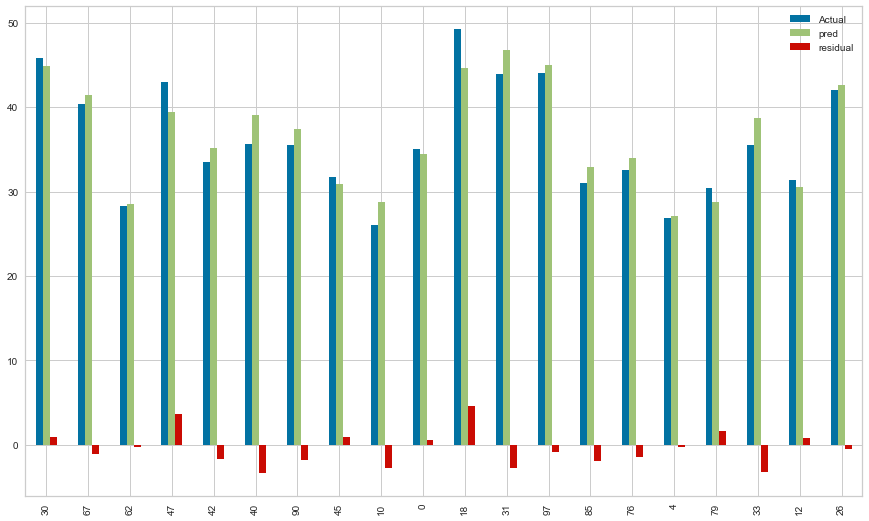

In [199]:
compare.head(20).plot(kind='bar',figsize=(15,9))
plt.show();

In [200]:
y_train_pred

array([38.51777695, 20.63601346, 48.49887365, 32.94298369, 48.74757755,
       32.07357958, 40.53527588, 36.60163684, 38.49402261, 32.78213273,
       30.45206145, 47.18146976, 18.34845933, 39.67436067, 36.04446475,
       25.51195402, 28.47006276, 37.19121078, 41.74099855, 33.5552724 ,
       35.50105851, 33.11663268, 32.61866106, 28.2584754 , 33.88809481,
       39.56337722, 27.32219232, 33.4635267 , 31.71763025, 34.96848247,
       46.6006928 , 28.47077885, 35.86853281, 40.43458352, 42.87847409,
       36.29646601, 37.2454928 , 27.85822146, 38.37940382, 38.76069943,
       34.45355146, 37.21942682, 30.4082026 , 43.03672495, 44.16841333,
       45.7010375 , 32.20507712, 36.62645383, 42.3229231 , 39.12282781,
       48.34536371, 29.05065874, 30.29689249, 27.9003035 , 52.1983519 ,
       37.66943313, 31.04893223, 28.23945146, 51.72228161, 40.35937006,
       24.90940954, 26.56128574, 43.10321081, 17.5119859 , 43.24212599,
       40.0682571 , 39.22995456, 42.28000714, 40.513399  , 17.25

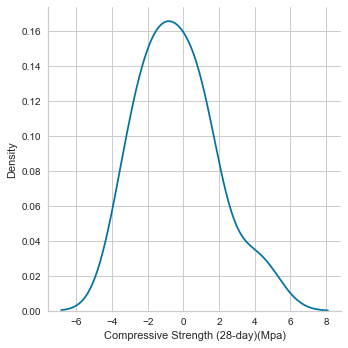

In [201]:
residuals = y_test-y_pred
sns.displot(residuals, kind="kde");

In [202]:
f"{len(residuals[residuals>0])} low + {len(residuals[residuals<0])} high = {len(X_test)}"

'8 low + 13 high = 21'

## OR show the the predicted values with another way.

In [203]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,"residuals":residuals})
results.sort_values(by="residuals",ascending=False)

,Actual,Predicted,residuals
18,49.300,44.674,4.626
47,43.010,39.400,3.610
79,30.430,28.745,1.685
100,50.500,49.008,1.492
30,45.820,44.889,0.931
45,31.770,30.865,0.905
12,31.370,30.505,0.865
0,34.990,34.471,0.519
4,26.820,27.054,-0.234
62,28.290,28.566,-0.276


In [204]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": 
    {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": 
    {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [205]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,0.907,0.912
mae,1.936,1.740
mse,5.874,4.454
rmse,2.424,2.111


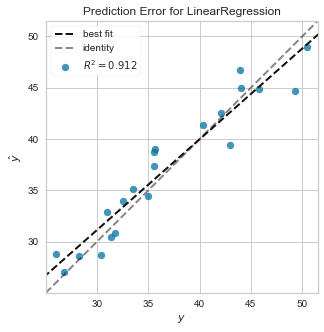

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [206]:
from yellowbrick.regressor import PredictionError

lr_model= LinearRegression()
visualizer = PredictionError(lr_model)
visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show() 

### Multicolineratiy

In [207]:
def color_red(val):
    
    if val > 0.90 and val < 0.99:
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'

In [208]:
pd.DataFrame(df).corr().style.applymap(color_red)

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
Cement,1.000000,-0.243553,-0.486535,0.221091,-0.106387,-0.309857,0.056959,0.145913,0.186461,0.445656
Slag,-0.243553,1.000000,-0.322619,-0.026775,0.306504,-0.223792,-0.183522,-0.284037,-0.327231,-0.331522
Fly ash,-0.486535,-0.322619,1.000000,-0.241321,-0.143508,0.172620,-0.282854,-0.118621,-0.055423,0.444380
Water,0.221091,-0.026775,-0.241321,1.000000,-0.155456,-0.602201,0.114591,0.466568,0.632026,-0.254320
SP,-0.106387,0.306504,-0.143508,-0.155456,1.000000,-0.104159,0.058290,-0.212902,-0.176314,-0.037909
Coarse Aggr.,-0.309857,-0.223792,0.172620,-0.602201,-0.104159,1.000000,-0.488537,-0.188157,-0.325787,-0.160610
Fine Aggr.,0.056959,-0.183522,-0.282854,0.114591,0.058290,-0.488537,1.000000,0.202272,0.190370,-0.154532
SLUMP(cm),0.145913,-0.284037,-0.118621,0.466568,-0.212902,-0.188157,0.202272,1.000000,0.906135,-0.223499
FLOW(cm),0.186461,-0.327231,-0.055423,0.632026,-0.176314,-0.325787,0.190370,0.906135,1.000000,-0.124189
Compressive Strength (28-day)(Mpa),0.445656,-0.331522,0.444380,-0.254320,-0.037909,-0.160610,-0.154532,-0.223499,-0.124189,1.000000


### Cross Validate

In [209]:
from sklearn.metrics import SCORERS
list(SCORERS.keys())

['explained_variance',
 'r2',
 'max_error',
 'neg_median_absolute_error',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_root_mean_squared_error',
 'neg_mean_poisson_deviance',
 'neg_mean_gamma_deviance',
 'accuracy',
 'top_k_accuracy',
 'roc_auc',
 'roc_auc_ovr',
 'roc_auc_ovo',
 'roc_auc_ovr_weighted',
 'roc_auc_ovo_weighted',
 'balanced_accuracy',
 'average_precision',
 'neg_log_loss',
 'neg_brier_score',
 'adjusted_rand_score',
 'rand_score',
 'homogeneity_score',
 'completeness_score',
 'v_measure_score',
 'mutual_info_score',
 'adjusted_mutual_info_score',
 'normalized_mutual_info_score',
 'fowlkes_mallows_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'jaccard',
 'jaccard_macro',
 'jaccard_m

In [210]:
from sklearn.model_selection import cross_validate, cross_val_score

In [211]:
model = LinearRegression()
scores = cross_validate(model, X_train_scaled, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [212]:
scores

{'fit_time': array([0.02998805, 0.00497937, 0.00300026, 0.00399756, 0.00598025]),
 'score_time': array([0.00299764, 0.00600219, 0.00299382, 0.00400233, 0.00200009]),
 'test_r2': array([0.94220789, 0.70662921, 0.86593428, 0.9231664 , 0.79288902]),
 'test_neg_mean_absolute_error': array([-1.90852381, -2.64731875, -1.48283132, -2.24410751, -2.86790526]),
 'test_neg_mean_squared_error': array([ -4.64518844, -10.75665819,  -3.72576227,  -8.43400919,
        -11.69826476]),
 'test_neg_root_mean_squared_error': array([-2.15526992, -3.27973447, -1.93022337, -2.90413657, -3.42027261])}

In [213]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.030,0.003,0.942,-1.909,-4.645,-2.155
2,0.005,0.006,0.707,-2.647,-10.757,-3.280
3,0.003,0.003,0.866,-1.483,-3.726,-1.930
4,0.004,0.004,0.923,-2.244,-8.434,-2.904
5,0.006,0.002,0.793,-2.868,-11.698,-3.420


In [214]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

test_r2                             0.846
test_neg_mean_absolute_error       -2.230
test_neg_mean_squared_error        -7.852
test_neg_root_mean_squared_error   -2.738
dtype: float64

In [215]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,0.907,0.912
mae,1.936,1.740
mse,5.874,4.454
rmse,2.424,2.111


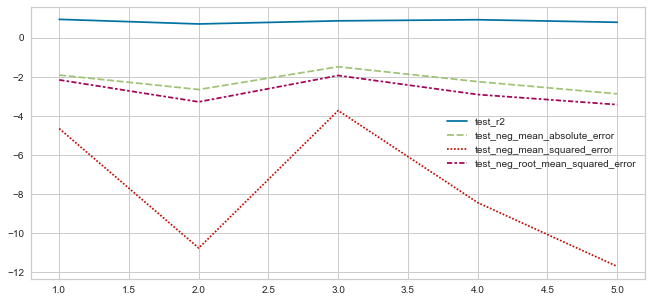

In [216]:
sns.lineplot(data = scores.iloc[:,2:]);

In [217]:
lr_model.coef_

array([ 4.28015177, -2.22287954,  3.9320198 , -4.77083923,  0.12109966,
       -5.27729122, -2.61131342, -2.18837804,  1.46570621])

In [218]:
lr_model_df = pd.DataFrame(lr_model.coef_, columns = ["lr_model_coef"])
lr_model_df

,lr_model_coef
0,4.280
1,-2.223
2,3.932
3,-4.771
4,0.121
5,-5.277
6,-2.611
7,-2.188
8,1.466


In [219]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.030,0.003,0.942,-1.909,-4.645,-2.155
2,0.005,0.006,0.707,-2.647,-10.757,-3.280
3,0.003,0.003,0.866,-1.483,-3.726,-1.930
4,0.004,0.004,0.923,-2.244,-8.434,-2.904
5,0.006,0.002,0.793,-2.868,-11.698,-3.420


# 2. Regularization

## 2.1 Ridge (Apply and evaluate)

In [220]:
from sklearn.linear_model import Ridge

In [221]:
ridge_model = Ridge(alpha=1, random_state=42)
ridge_model.fit(X_train_scaled,y_train)

Ridge(alpha=1, random_state=42)

In [222]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [223]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.906,0.911
mae,1.938,1.732
mse,5.922,4.493
rmse,2.434,2.120


In [224]:
pd.concat([ls, rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.907,0.912,0.906,0.911
mae,1.936,1.740,1.938,1.732
mse,5.874,4.454,5.922,4.493
rmse,2.424,2.111,2.434,2.120


### According to the R2 results, since the socores of the linear and the ridge train and test scores are close to each other, we can't say that there is an overfitting or underfitting.

### For Ridge Regression CV with alpha : 1 

In [225]:
model = Ridge(alpha=1, random_state=42)  
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [226]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.004,0.007,0.945,-1.834,-4.401,-2.098
2,0.004,0.003,0.709,-2.651,-10.671,-3.267
3,0.003,0.004,0.871,-1.486,-3.588,-1.894
4,0.007,0.004,0.921,-2.257,-8.720,-2.953
5,0.004,0.003,0.806,-2.790,-10.964,-3.311


In [227]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                             0.850
test_neg_mean_absolute_error       -2.204
test_neg_mean_squared_error        -7.669
test_neg_root_mean_squared_error   -2.705
dtype: float64

### ??? We can say that Rigge model's real score is 0.860, not 0.936 ???

In [228]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

,ridge_train,ridge_test
R2,0.906,0.911
mae,1.938,1.732
mse,5.922,4.493
rmse,2.434,2.120


<AxesSubplot:>

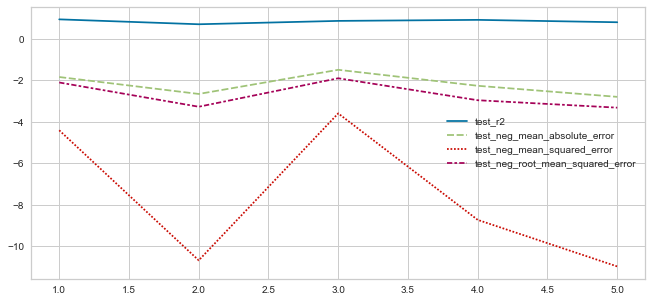

In [229]:
sns.lineplot(data = scores.iloc[:,2:])

In [230]:
ridge_model.coef_  

array([ 5.01092233, -1.37765187,  4.8062743 , -3.90644878,  0.26138511,
       -4.06644253, -1.74660531, -1.95498663,  1.13349998])

In [231]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])

In [232]:
pd.concat([lr_model_df,rm_df], axis = 1)

,lr_model_coef,ridge_coef_1
0,4.280,5.011
1,-2.223,-1.378
2,3.932,4.806
3,-4.771,-3.906
4,0.121,0.261
5,-5.277,-4.066
6,-2.611,-1.747
7,-2.188,-1.955
8,1.466,1.133


#### Choosing best alpha value with Cross-Validation=Hyperparameter tuning

In [233]:
from sklearn.linear_model import RidgeCV

In [234]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [235]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [236]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [237]:
ridge_cv_model.alpha_ #Ridge(alpha=0.62)

0.62

In [238]:
ridge_cv_model.best_score_  # rmse for ridge with cv

-2.7012242171707923

In [239]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [240]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,0.907,0.912
mae,1.937,1.732
mse,5.900,4.460
rmse,2.429,2.112


In [241]:
pd.concat([ls, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.907,0.912,0.906,0.911,0.907,0.912
mae,1.936,1.740,1.938,1.732,1.937,1.732
mse,5.874,4.454,5.922,4.493,5.900,4.460
rmse,2.424,2.111,2.434,2.120,2.429,2.112


In [242]:
ridge_cv_model.coef_

array([ 4.96111503, -1.45689908,  4.73402774, -4.04457692,  0.24206468,
       -4.21835873, -1.84758349, -2.02892574,  1.23914279])

In [243]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns=["ridge_cv_coef_0.62"])

In [244]:
pd.concat([lr_model_df,rm_df, rcm_df], axis = 1)

,lr_model_coef,ridge_coef_1,ridge_cv_coef_0.62
0,4.280,5.011,4.961
1,-2.223,-1.378,-1.457
2,3.932,4.806,4.734
3,-4.771,-3.906,-4.045
4,0.121,0.261,0.242
5,-5.277,-4.066,-4.218
6,-2.611,-1.747,-1.848
7,-2.188,-1.955,-2.029
8,1.466,1.133,1.239


## 2.2 Lasso (Apply and evalute)

In [397]:
from sklearn.linear_model import Lasso, LassoCV

In [398]:
lasso_model = Lasso(alpha=1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

### OR

In [399]:
lasso_model = Lasso().fit(X_train_scaled,y_train)

In [400]:
lasso_model.alpha

1.0

In [401]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [402]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.776,0.802
mae,2.960,2.466
mse,14.144,10.036
rmse,3.761,3.168


In [403]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.907,0.912,0.906,0.911,0.907,0.912,0.776,0.802
mae,1.936,1.740,1.938,1.732,1.937,1.732,2.960,2.466
mse,5.874,4.454,5.922,4.493,5.900,4.460,14.144,10.036
rmse,2.424,2.111,2.434,2.120,2.429,2.112,3.761,3.168


#### For Lasso CV with Default Alpha : 1

In [404]:
model = Lasso(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [405]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.004,0.004,0.831,-3.127,-13.577,-3.685
2,0.003,0.003,0.496,-3.395,-18.497,-4.301
3,0.003,0.002,0.678,-2.371,-8.940,-2.990
4,0.002,0.002,0.677,-4.408,-35.451,-5.954
5,0.002,0.002,0.730,-3.315,-15.260,-3.906


In [406]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                              0.682
test_neg_mean_absolute_error        -3.323
test_neg_mean_squared_error        -18.345
test_neg_root_mean_squared_error    -4.167
dtype: float64

In [407]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

,lasso_train,lasso_test
R2,0.776,0.802
mae,2.960,2.466
mse,14.144,10.036
rmse,3.761,3.168


<AxesSubplot:>

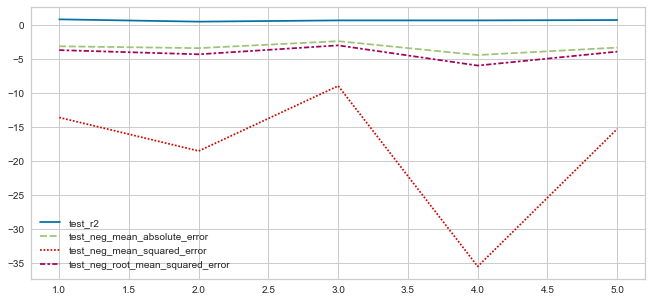

In [408]:
sns.lineplot(data = scores.iloc[:,2:])

In [409]:
lasso_model.coef_

array([ 4.82131411, -0.        ,  4.88005283, -0.81976891,  0.        ,
       -0.35149513, -0.        , -0.71063068, -0.        ])

In [410]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [411]:
pd.concat([lr_model_df, rm_df, rcm_df, lsm_df], axis = 1)

,lr_model_coef,ridge_coef_1,ridge_cv_coef_0.62,lasso_coef_1
0,4.280,5.011,100.000,4.821
1,-2.223,-1.378,-29.366,-0.000
2,3.932,4.806,95.423,4.880
3,-4.771,-3.906,-81.526,-0.820
4,0.121,0.261,4.879,0.000
5,-5.277,-4.066,-85.028,-0.351
6,-2.611,-1.747,-37.241,-0.000
7,-2.188,-1.955,-40.897,-0.711
8,1.466,1.133,24.977,-0.000


### Choosing best alpha value with Cross-Validation

In [412]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=42)

In [413]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=100000, random_state=42)

In [417]:
lasso_cv_model.alpha_

0.01

In [418]:
np.where(alpha_space[::-1]==lasso_cv_model.alpha_)

(array([99], dtype=int64),)

In [419]:
alpha_space[::-1]

array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
       0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
       0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
       0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
       0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46,
       0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35,
       0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02,
       0.01])

In [420]:
#mse score for CV
lasso_cv_model.mse_path_[-1].mean()

7.971197299047472

In [421]:
y_pred = lasso_cv_model.predict(X_test_scaled)   #Lasso(alpha =0.01)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [424]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.907,0.913
mae,1.936,1.721
mse,5.898,4.413
rmse,2.429,2.101


In [423]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.907,0.912,0.906,0.911,0.907,0.912,0.776,0.802,0.907,0.913
mae,1.936,1.740,1.938,1.732,1.937,1.732,2.960,2.466,1.936,1.721
mse,5.874,4.454,5.922,4.493,5.900,4.460,14.144,10.036,5.898,4.413
rmse,2.424,2.111,2.434,2.120,2.429,2.112,3.761,3.168,2.429,2.101


In [269]:
lasso_cv_model.coef_

array([ 5.24250929, -1.18453685,  5.04101662, -3.91994742,  0.25988526,
       -3.94529246, -1.62357732, -2.04660858,  1.27998259])

In [270]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.01"])

In [271]:
pd.concat([lr_model_df, rm_df, rcm_df, lsm_df, lcm_df], axis = 1)

,lr_model_coef,ridge_coef_1,ridge_cv_coef_0.62,lasso_coef_1,lasso_cv_coef_0.01
0,4.280,5.011,4.961,4.821,5.243
1,-2.223,-1.378,-1.457,-0.000,-1.185
2,3.932,4.806,4.734,4.880,5.041
3,-4.771,-3.906,-4.045,-0.820,-3.920
4,0.121,0.261,0.242,0.000,0.260
5,-5.277,-4.066,-4.218,-0.351,-3.945
6,-2.611,-1.747,-1.848,-0.000,-1.624
7,-2.188,-1.955,-2.029,-0.711,-2.047
8,1.466,1.133,1.239,-0.000,1.280


## 2.3 Elastic-Net (Apply and evaluate )
* Use Gridsearch for hyperparameter tuning instead of ElacticnetCV

In [272]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [273]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1, random_state=42)

### OR

In [274]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42).fit(X_train_scaled,y_train)
elastic_model

ElasticNet(alpha=1, random_state=42)

In [275]:
elastic_model.get_params()

{'alpha': 1,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': 42,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [276]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [277]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.637,0.635
mae,3.803,3.556
mse,22.982,18.466
rmse,4.794,4.297


In [278]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,0.907,0.912,0.906,0.911,0.907,0.912,0.776,0.802,0.907,0.913,0.637,0.635
mae,1.936,1.740,1.938,1.732,1.937,1.732,2.960,2.466,1.936,1.721,3.803,3.556
mse,5.874,4.454,5.922,4.493,5.900,4.460,14.144,10.036,5.898,4.413,22.982,18.466
rmse,2.424,2.111,2.434,2.120,2.429,2.112,3.761,3.168,2.429,2.101,4.794,4.297


### For Elastic_net CV with Default alpha = 1 and l1_ratio=0.5

In [279]:
model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [280]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.570,-4.891,-34.545,-5.878
2,0.460,-3.334,-19.789,-4.449
3,0.542,-3.014,-12.725,-3.567
4,0.538,-5.548,-50.745,-7.124
5,0.605,-4.223,-22.316,-4.724


In [281]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                              0.543
test_neg_mean_absolute_error        -4.202
test_neg_mean_squared_error        -28.024
test_neg_root_mean_squared_error    -5.148
dtype: float64

In [282]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

,elastic_train,elastic_test
R2,0.637,0.635
mae,3.803,3.556
mse,22.982,18.466
rmse,4.794,4.297


In [283]:
elastic_model.coef_

array([ 2.61657059, -0.73015253,  2.67139945, -1.20195947,  0.        ,
       -1.16386814, -0.32234008, -0.82569551, -0.        ])

In [284]:
em_df = pd.DataFrame(elastic_model.coef_, columns=["elastic_coef_(alp:1, l1:0.5)"])

In [285]:
pd.concat([lr_model_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis = 1)

,lr_model_coef,ridge_coef_1,ridge_cv_coef_0.62,lasso_coef_1,lasso_cv_coef_0.01,"elastic_coef_(alp:1, l1:0.5)"
0,4.280,5.011,4.961,4.821,5.243,2.617
1,-2.223,-1.378,-1.457,-0.000,-1.185,-0.730
2,3.932,4.806,4.734,4.880,5.041,2.671
3,-4.771,-3.906,-4.045,-0.820,-3.920,-1.202
4,0.121,0.261,0.242,0.000,0.260,0.000
5,-5.277,-4.066,-4.218,-0.351,-3.945,-1.164
6,-2.611,-1.747,-1.848,-0.000,-1.624,-0.322
7,-2.188,-1.955,-2.029,-0.711,-2.047,-0.826
8,1.466,1.133,1.239,-0.000,1.280,-0.000


### Choosing best alpha and l1_ratio values with Cross-Validation

In [286]:
elastic_cv_model = ElasticNetCV(alphas = alpha_space, l1_ratio=[0.1, 0.5, 0.7,0.9, 0.95, 1], cv = 5, 
                                max_iter = 100000,random_state=42)

In [287]:
elastic_cv_model.fit(X_train_scaled, y_train)

ElasticNetCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], max_iter=100000,
             random_state=42)

In [288]:
elastic_cv_model.alpha_

0.01

In [289]:
elastic_cv_model.l1_ratio_

0.1

In [290]:
#mse score for CV
elastic_cv_model.mse_path_[5][-1].mean()

7.971197299047472

In [291]:
y_pred = elastic_cv_model.predict(X_test_scaled)
y_train_pred = elastic_cv_model.predict(X_train_scaled)

In [292]:
ecs = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_cv")
ecs

,elastic_cv_train,elastic_cv_test
R2,0.907,0.912
mae,1.937,1.731
mse,5.908,4.470
rmse,2.431,2.114


In [293]:
pd.concat([ls,rs, rcs, lss, lcs, es, ecs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_cv_train,elastic_cv_test
R2,0.907,0.912,0.906,0.911,0.907,0.912,0.776,0.802,0.907,0.913,0.637,0.635,0.907,0.912
mae,1.936,1.740,1.938,1.732,1.937,1.732,2.960,2.466,1.936,1.721,3.803,3.556,1.937,1.731
mse,5.874,4.454,5.922,4.493,5.900,4.460,14.144,10.036,5.898,4.413,22.982,18.466,5.908,4.470
rmse,2.424,2.111,2.434,2.120,2.429,2.112,3.761,3.168,2.429,2.101,4.794,4.297,2.431,2.114


In [294]:
elastic_cv_model.coef_

array([ 5.00793722, -1.39757569,  4.7936438 , -3.96959109,  0.25260917,
       -4.12548316, -1.78209123, -1.99372807,  1.19066561])

In [295]:
ecm_df = pd.DataFrame(elastic_cv_model.coef_, columns=["elastic_coef_(alp:0.01, l1:0.1)"])

In [296]:
pd.concat([lr_model_df, rm_df, rcm_df, lsm_df, lcm_df, em_df, ecm_df], axis = 1)

,lr_model_coef,ridge_coef_1,ridge_cv_coef_0.62,lasso_coef_1,lasso_cv_coef_0.01,"elastic_coef_(alp:1, l1:0.5)","elastic_coef_(alp:0.01, l1:0.1)"
0,4.280,5.011,4.961,4.821,5.243,2.617,5.008
1,-2.223,-1.378,-1.457,-0.000,-1.185,-0.730,-1.398
2,3.932,4.806,4.734,4.880,5.041,2.671,4.794
3,-4.771,-3.906,-4.045,-0.820,-3.920,-1.202,-3.970
4,0.121,0.261,0.242,0.000,0.260,0.000,0.253
5,-5.277,-4.066,-4.218,-0.351,-3.945,-1.164,-4.125
6,-2.611,-1.747,-1.848,-0.000,-1.624,-0.322,-1.782
7,-2.188,-1.955,-2.029,-0.711,-2.047,-0.826,-1.994
8,1.466,1.133,1.239,-0.000,1.280,-0.000,1.191


### Grid Search

In [297]:
from sklearn.model_selection import GridSearchCV

In [298]:
elastic_model = ElasticNet(max_iter=10000, random_state=42)

In [299]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [300]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =5, verbose =2)

In [301]:
grid_model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.7; total time=   0.0s
[CV] END ...........................alpha=0.01,

[CV] END ............................alpha=0.6, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.6, l1_ratio=0.9; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=ElasticNet(max_iter=10000, random_state=42),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [302]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 0.1}

In [303]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005,0.001,0.001,0.000,0.010,0.100,"{'alpha': 0.01, 'l1_ratio': 0.1}",-2.091,-3.273,-1.889,-2.928,-3.330,-2.702,0.601,1
1,0.004,0.001,0.002,0.001,0.010,0.500,"{'alpha': 0.01, 'l1_ratio': 0.5}",-2.090,-3.281,-1.888,-2.928,-3.362,-2.710,0.610,4
2,0.005,0.002,0.001,0.000,0.010,0.700,"{'alpha': 0.01, 'l1_ratio': 0.7}",-2.092,-3.286,-1.889,-2.935,-3.391,-2.718,0.617,6
3,0.005,0.000,0.002,0.001,0.010,0.900,"{'alpha': 0.01, 'l1_ratio': 0.9}",-2.099,-3.292,-1.891,-2.953,-3.473,-2.741,0.636,7
4,0.006,0.001,0.001,0.001,0.010,0.950,"{'alpha': 0.01, 'l1_ratio': 0.95}",-2.102,-3.294,-1.892,-2.961,-3.484,-2.747,0.638,10
5,0.006,0.002,0.001,0.001,0.010,0.990,"{'alpha': 0.01, 'l1_ratio': 0.99}",-2.105,-3.296,-1.893,-2.963,-3.488,-2.749,0.638,13
6,0.004,0.001,0.001,0.001,0.010,1,"{'alpha': 0.01, 'l1_ratio': 1}",-2.105,-3.296,-1.894,-2.963,-3.490,-2.750,0.639,14
7,0.003,0.001,0.001,0.001,0.012,0.100,"{'alpha': 0.012, 'l1_ratio': 0.1}",-2.091,-3.271,-1.890,-2.936,-3.325,-2.703,0.600,2
8,0.003,0.001,0.000,0.000,0.012,0.500,"{'alpha': 0.012, 'l1_ratio': 0.5}",-2.086,-3.280,-1.887,-2.934,-3.357,-2.709,0.610,3
9,0.003,0.000,0.001,0.000,0.012,0.700,"{'alpha': 0.012, 'l1_ratio': 0.7}",-2.087,-3.286,-1.887,-2.940,-3.388,-2.718,0.618,5


In [304]:
grid_model.best_index_

0

In [305]:
grid_model.best_score_

-2.7021815548630657

### Using Best Hyper Parameters From GridSearch

In [306]:
y_pred = grid_model.predict(X_test_scaled)
y_train_pred = grid_model.predict(X_train_scaled)

In [307]:
train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

,GridSearch_train,GridSearch_test
R2,0.907,0.912
mae,1.937,1.731
mse,5.908,4.470
rmse,2.431,2.114


### Final Model

In [425]:
final_scaler = StandardScaler()
X_train_scaled = final_scaler.fit_transform(X_train)

In [426]:
X_train_scaled.shape

(82, 9)

In [427]:
X_train_scaled

array([[ 0.99742015, -1.29720985, -0.03597016,  1.05552803,  0.49979299,
         0.26854971, -0.94918597,  0.70678525,  0.76407019],
       [-1.04096079,  1.65777393, -1.64936204, -0.65655824,  0.84332212,
         0.95172686,  0.28924939, -1.96043118, -1.59112335],
       [ 1.13668842,  0.78769537,  0.21399196,  0.71311078, -0.87432353,
        -1.90623086, -0.2575922 , -1.73816315, -1.59112335],
       [ 0.85815189,  0.45936384, -1.64936204, -0.50980799, -0.87432353,
        -0.10719771,  1.2220968 , -1.62702913, -1.59112335],
       [ 0.22891256,  0.36086438,  1.06727175, -1.34628443, -0.29032401,
         0.74905097, -1.58287887, -1.96043118, -1.59112335],
       [-0.90169252,  0.60711303,  0.04356324, -1.04789225,  2.21743863,
         0.73538743, -0.30584293,  0.65121824,  0.34349992],
       [ 0.80750889,  0.44294726, -0.10414165,  0.51744378, -0.87432353,
        -1.61018743,  0.62700448,  0.70678525, -0.07707036],
       [-0.93967478, -1.29720985,  1.11158322, -0.80330849,  0

In [428]:
y_train

53    38.590
22    18.520
68    46.360
44    30.970
98    49.970
       ...  
71    28.160
14    32.440
92    44.480
51    32.040
102   48.700
Name: Compressive Strength (28-day)(Mpa), Length: 82, dtype: float64

In [429]:
y_train.shape

(82,)

In [430]:
final_model = Lasso(alpha = 0.01) # LassoCV model

In [431]:
#final_model= Lasso(alpha=1)

In [432]:
final_model.fit(X_train_scaled,y_train)

Lasso(alpha=0.01)

In [433]:
#final_model.fit(X_train_scaled, y_train)

In [434]:
final_model.fit(X_train_scaled,y_train)

Lasso(alpha=0.01)

### Feature importances with Ridge

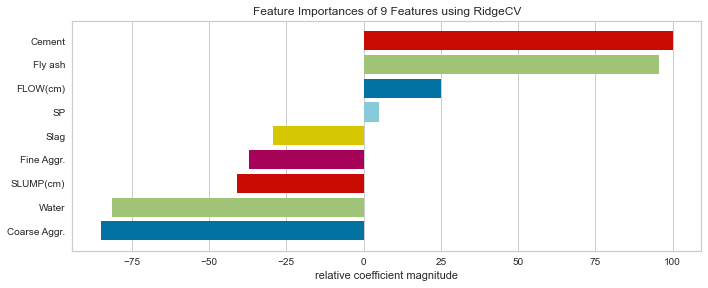

<AxesSubplot:title={'center':'Feature Importances of 9 Features using RidgeCV'}, xlabel='relative coefficient magnitude'>

In [435]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(ridge_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 300))
viz.fit(X_train, y_train)
viz.show()

### Feature importances with Lasso

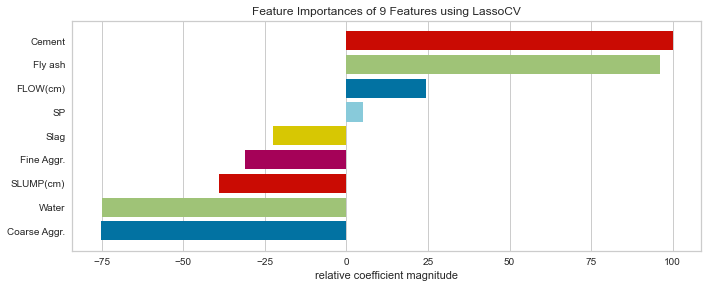

<AxesSubplot:title={'center':'Feature Importances of 9 Features using LassoCV'}, xlabel='relative coefficient magnitude'>

In [436]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(X_train).columns)
visualizer = RadViz(size=(720, 300))
viz.fit(X_train, y_train)
viz.show()